In [1]:
import glob

In [2]:
# path = 'timing_data/time_4'
# path += '/time_ah_*'
# txt_files = glob.glob(path)

# classes = [0, 1, 16, 17, 18, 2, 20, 22, 25, 27, 3, 31, 34, 4, 5, 6, 8, 89, 9]
classes = [0, 1, 2, 3, 4, 5, 6, 8, 9]

txt_files_ah = []
for i in classes:
    path = 'timing_data/time_' + str(i)
    path += '/time_' + 'ah' + '_*'
    txt_files_ah += glob.glob(path)
    
    
txt_files_bclf = []
for i in classes:
    path = 'timing_data/time_' + str(i)
    path += '/time_' + 'bclf' + '_*'
    txt_files_bclf += glob.glob(path)

In [3]:
txt_files_bclf

['timing_data/time_0/time_bclf_0_1_8.txt',
 'timing_data/time_0/time_bclf_0_1_12.tx',
 'timing_data/time_0/time_bclf_0_1_5.txt',
 'timing_data/time_0/time_bclf_0_1_13.tx',
 'timing_data/time_0/time_bclf_0_1_2.txt',
 'timing_data/time_0/time_bclf_0_1_16.tx',
 'timing_data/time_0/time_bclf_0_1_15.tx',
 'timing_data/time_0/time_bclf_0_1_14.tx',
 'timing_data/time_0/time_bclf_0_1_17.tx',
 'timing_data/time_0/time_bclf_0_1_10.tx',
 'timing_data/time_0/time_bclf_0_1_4.txt',
 'timing_data/time_0/time_bclf_0_1_0.txt',
 'timing_data/time_0/time_bclf_0_1_18.tx',
 'timing_data/time_0/time_bclf_0_1_7.txt',
 'timing_data/time_0/time_bclf_0_1_11.tx',
 'timing_data/time_0/time_bclf_0_1_19.tx',
 'timing_data/time_0/time_bclf_0_1_1.txt',
 'timing_data/time_0/time_bclf_0_1_9.txt',
 'timing_data/time_0/time_bclf_0_1_6.txt',
 'timing_data/time_0/time_bclf_0_1_3.txt',
 'timing_data/time_1/time_bclf_1_3_8.txt',
 'timing_data/time_1/time_bclf_1_15_3.tx',
 'timing_data/time_1/time_bclf_1_8_3.txt',
 'timing_da

In [4]:
len(txt_files_bclf)

640

In [5]:
ah_values = []
ah_target = []
for filename in txt_files_ah:
    for m in range(20):
        if filename[18] == '/':
            ah_target += [int(filename[17])]
        else:
            ah_target += [int(''.join(filename[17:19]))]
    
    with open(filename) as f:
        ah_values += f.readlines()
        
        
bclf_values = []
bclf_target = []
for filename in txt_files_bclf:
    for m in range(20):
        if filename[18] == '/':
            bclf_target += [int(filename[17])]
        else:
            bclf_target += [int(''.join(filename[17:19]))]
    
    with open(filename) as f:
        bclf_values += f.readlines()

In [6]:
i = 0;
for elem in ah_values:
    ah_values[i] = int(elem)
    i += 1
    
i = 0;
for elem in bclf_values:
    bclf_values[i] = int(elem)
    i += 1

In [7]:
import pandas as pd
import numpy as np
array = np.array([[i, j, k] for i, j, k in zip(ah_values, bclf_values, bclf_target)])
index_values = [i for i in range(len(ah_values))]
column_values = ['time_ah', 'time_bclf', 'class']
df = pd.DataFrame(data=array, index=index_values, columns=column_values)

In [8]:
df

,time_ah,time_bclf,class
0,320,330,0
1,300,320,0
2,328,336,0
3,320,320,0
4,340,314,0
...,...,...,...
12795,520,320,9
12796,520,328,9
12797,504,320,9
12798,520,332,9


In [9]:
# Removing the Outliers based on the values of "time_ah"

Q1 = np.percentile(df['time_ah'], 25, method='median_unbiased')
Q3 = np.percentile(df['time_ah'], 75, method='median_unbiased')
IQR = Q3 - Q1

upper = np.where(df['time_ah'] >= (Q3 + 1.5 * IQR))[0]
lower = np.where(df['time_ah'] <= (Q3 - 1.5 * IQR))[0]

df.drop(upper, inplace=True)
df.drop(lower, inplace=True)

In [10]:
# resetting the indexes of dataframe after dropping outliers

df.reset_index(drop=True, inplace=True)

In [11]:
# Removing the Outliers based on the values of "time_bclf"

Q1 = np.percentile(df['time_bclf'], 25, method='median_unbiased')
Q3 = np.percentile(df['time_bclf'], 75, method='median_unbiased')
IQR = Q3 - Q1

upper = np.where(df['time_bclf'] >= (Q3 + 1.5 * IQR))[0]
lower = np.where(df['time_bclf'] <= (Q3 - 1.5 * IQR))[0]

df.drop(upper, inplace=True)
df.drop(lower, inplace=True)

In [12]:
len(df['time_ah'])

9792

In [13]:
df['time_bclf'].max()

720

In [14]:
feature_columns = ['time_ah', 'time_bclf']
X = df[feature_columns].values
y = df['class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6

def knn_comparison(data, k):
    x = data[feature_columns].values
    y = data['class'].astype(int).values
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf)
    
    # Adding axes annotations
    plt.xlabel('time_bclf')
    plt.ylabel('time_ah')
    
    # Correcting sizes
    plt.legend(bbox_to_anchor=(1,0.7))
    plt.rcParams['figure.figsize'] = [18, 12]
 
    
    plt.title('Knn with K='+ str(k))
    plt.show()

/home/rohan/Sarvottam/iitkgp_research/analyze_instructions/parse_instrutions/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


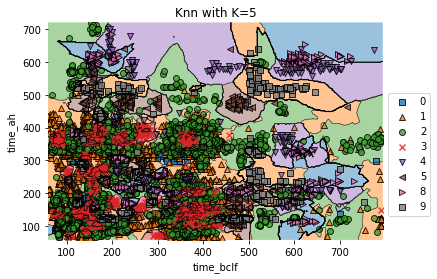

In [16]:
knn_comparison(df, 5)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

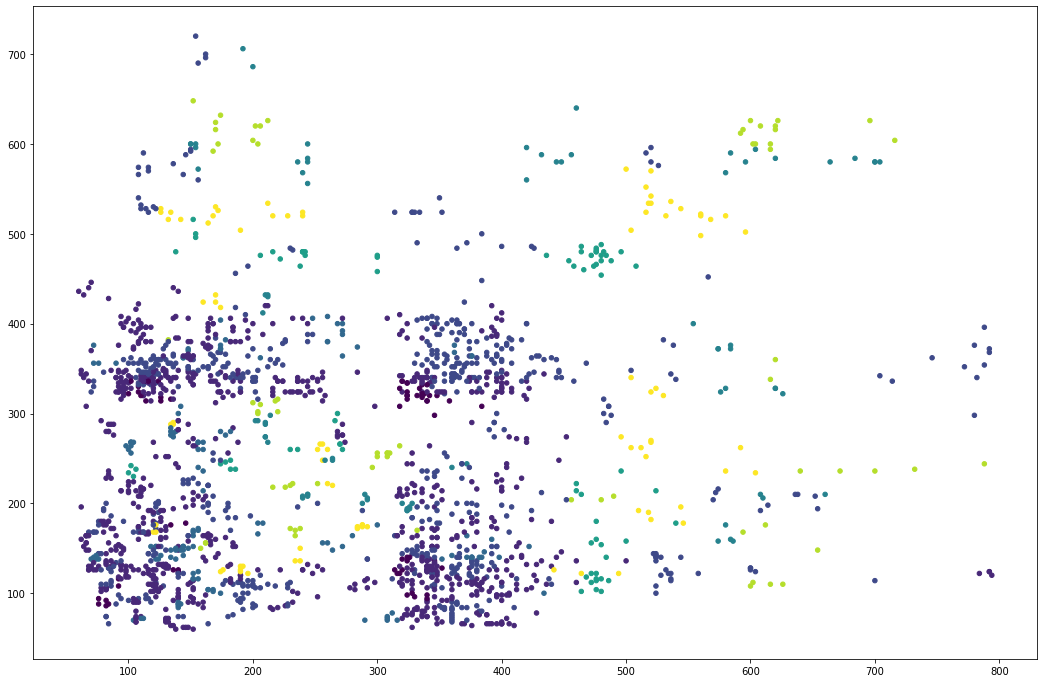

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20, cmap='viridis');

In [20]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7238386932108218


## Testing the KNN clustering template

In [ ]:
classes = [2, 3]

test_files_ah = []
for i in classes:
    path = 'test_for_data/uops-' + str(i)
    path += '/time_' + 'ah' + '_*'
    test_files_ah += glob.glob(path)
    
    
test_files_bclf = []
for i in classes:
    path = 'test_for_data/uops-' + str(i)
    path += '/time_' + 'bclf' + '_*'
    test_files_bclf += glob.glob(path)

In [ ]:
test_files_bclf

In [ ]:
ah_values = []
bclf_values = []
num_2 = 0
num_3 = 0

for filename in test_files_ah:
    if 'uops-3' in filename and num_2 == 0:
        num_2 = len(ah_values)
        
    with open(filename) as f:
        ah_values += [int(line.rstrip('\n')) for line in f.readlines()]
        
num_3 = len(ah_values) - num_2
        
        
for filename in test_files_bclf:            
    with open(filename) as f:
        bclf_values += [int(line.rstrip('\n')) for line in f.readlines()]

In [ ]:
bclf_target = []
ah_target = []

for i in range(num_2):
    bclf_target += [2]
    ah_target += [2]

for i in range(num_3):
    bclf_target += [3]
    ah_target += [3]

In [ ]:
import pandas as pd
import numpy as np
array = np.array([[i, j, k] for i, j, k in zip(ah_values, bclf_values, bclf_target)])
index_values = [i for i in range(len(ah_values))]
column_values = ['time_ah', 'time_bclf', 'class']
df = pd.DataFrame(data=array, index=index_values, columns=column_values)

In [ ]:
X = df[feature_columns].values
y = df['class'].values

y_pred = knn.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred))